In [64]:
import pandas as pd
import numpy as np
# import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
carbon_df = pd.read_csv("../data/raw/carbon_emission_raw.csv")

In [66]:
carbon_df = carbon_df.drop(['Indicator Name', 'Indicator Code'], axis=1)


In [67]:
non_country_names = [
    'Africa Eastern and Southern', 'Africa Western and Central', 'Arab World', 'Bahamas, The',
    'Central Europe and the Baltics', 'Caribbean small states', 'East Asia & Pacific (excluding high income)',
    'Early-demographic dividend', 'East Asia & Pacific', 'Europe & Central Asia (excluding high income)',
    'Europe & Central Asia', 'Euro area', 'European Union', 'Fragile and conflict affected situations',
    'Heavily indebted poor countries (HIPC)', 'High income', 'IBRD only', 'IDA & IBRD total', 'IDA total',
    'IDA blend', 'IDA only', 'Latin America & Caribbean (excluding high income)', 'Latin America & Caribbean',
    'Least developed countries: UN classification', 'Low income', 'Lower middle income', 'Low & middle income',
    'Late-demographic dividend', 'Middle East & North Africa', 'Middle income', 'Middle East & North Africa (excluding high income)',
    'North America', 'OECD members', 'Other small states', 'Pacific island small states', 'Post-demographic dividend',
    'Pre-demographic dividend', 'Small states', 'Sub-Saharan Africa (excluding high income)', 'Sub-Saharan Africa',
    'East Asia & Pacific (IDA & IBRD countries)', 'Europe & Central Asia (IDA & IBRD countries)',
    'Latin America & the Caribbean (IDA & IBRD countries)', 'Middle East & North Africa (IDA & IBRD countries)',
    'South Asia (IDA & IBRD)', 'Sub-Saharan Africa (IDA & IBRD countries)', 'Upper middle income', 'World'
]

carbon_df_filtered = carbon_df[~carbon_df['Country Name'].isin(non_country_names)]
carbon_df_filtered.head()
carbon_df_new = carbon_df_filtered.copy()

In [68]:
carbon_df_new.head()

,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,Afghanistan,AFG,2046.870,1941.370,1525.470,1527.890,1493.590,1457.690,1407.300,1344.100,...,11961.890,10208.130,9402.05,9281.340,10057.590,9294.930,10022.780,10972.38,11238.830,8709.470000
3,Angola,AGO,6564.200,6674.500,6877.300,9269.700,11298.230,12719.480,15442.400,16154.900,...,23865.800,23868.000,26958.70,29610.500,31648.900,29520.700,25064.800,23637.40,24382.900,19814.500000
4,Albania,ALB,6060.500,4119.600,2239.300,2078.400,2084.700,1951.100,1968.000,1479.160,...,5136.700,4541.800,4795.40,5188.000,4797.000,4573.200,5403.700,5316.10,4993.300,4383.200000
5,Andorra,AND,406.704,406.704,406.704,410.368,406.704,425.024,454.336,465.328,...,490.976,487.312,476.32,461.664,465.328,468.992,465.328,494.64,479.984,448.884399
7,United Arab Emirates,ARE,55210.400,61564.100,59702.800,63620.200,70779.600,75166.700,78528.300,81440.900,...,166631.500,175687.900,184960.80,186639.800,195409.400,200398.500,191935.000,174220.30,185645.700,188088.700000


In [69]:
carbon_df_new['Total Emission'] = carbon_df.iloc[:, 2:].sum(axis=1)
carbon_df_new['Yearly Mean'] = carbon_df.iloc[:, 2:].mean(axis=1)
carbon_df_new['Yearly Standard Deviation'] = carbon_df.iloc[:, 2:].std(axis=1)
carbon_df_new['Yearly Minimum'] = carbon_df.iloc[:, 2:].min(axis=1)
carbon_df_new['Yearly Maximum'] = carbon_df.iloc[:, 2:].max(axis=1)

In [70]:
carbon_df_new.head()

,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2016,2017,2018,2019,2020,Total Emission,Yearly Mean,Yearly Standard Deviation,Yearly Minimum,Yearly Maximum
1,Afghanistan,AFG,2046.870,1941.370,1525.470,1527.890,1493.590,1457.690,1407.300,1344.100,...,9294.930,10022.780,10972.38,11238.830,8709.470000,1.494529e+05,4821.062355,4071.228614,1078.120,11961.890
3,Angola,AGO,6564.200,6674.500,6877.300,9269.700,11298.230,12719.480,15442.400,16154.900,...,29520.700,25064.800,23637.40,24382.900,19814.500000,5.723800e+05,18463.870645,6639.377098,6564.200,31648.900
4,Albania,ALB,6060.500,4119.600,2239.300,2078.400,2084.700,1951.100,1968.000,1479.160,...,4573.200,5403.700,5316.10,4993.300,4383.200000,1.203406e+05,3881.954839,1245.740934,1479.160,6060.500
5,Andorra,AND,406.704,406.704,406.704,410.368,406.704,425.024,454.336,465.328,...,468.992,465.328,494.64,479.984,448.884399,1.503160e+04,484.890464,48.968257,406.704,575.248
7,United Arab Emirates,ARE,55210.400,61564.100,59702.800,63620.200,70779.600,75166.700,78528.300,81440.900,...,200398.500,191935.000,174220.30,185645.700,188088.700000,3.905361e+06,125979.390323,49610.023669,55210.400,200398.500


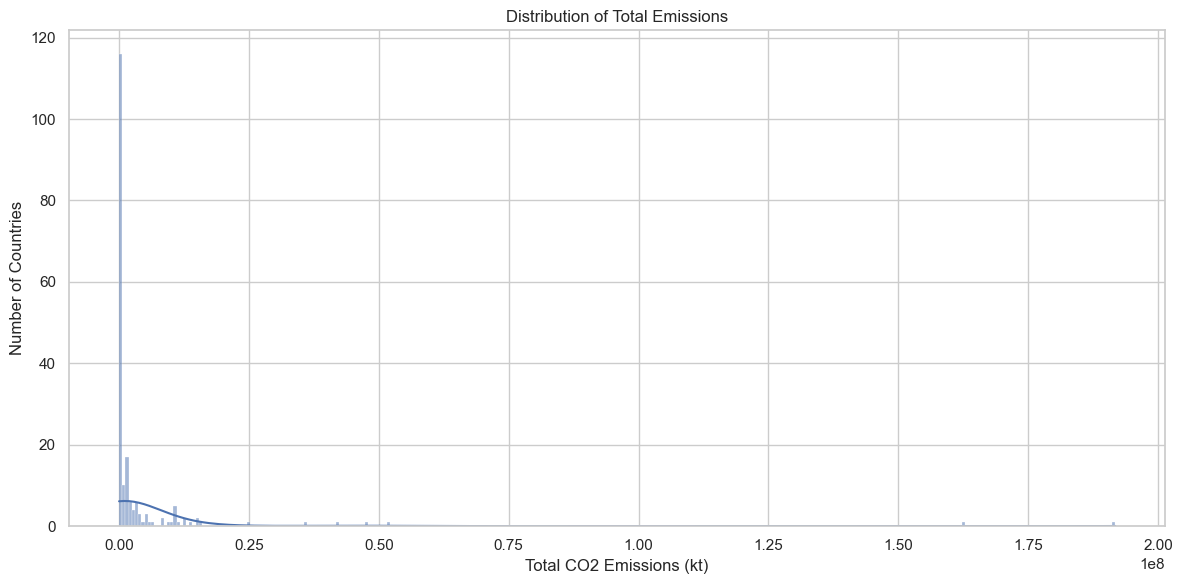

In [71]:
plt.figure(figsize=(12, 6))
sns.histplot(carbon_df_new['Total Emission'], kde=True)
plt.title('Distribution of Total Emissions')
plt.xlabel('Total CO2 Emissions (kt)')
plt.ylabel('Number of Countries')
plt.tight_layout() 
plt.show()


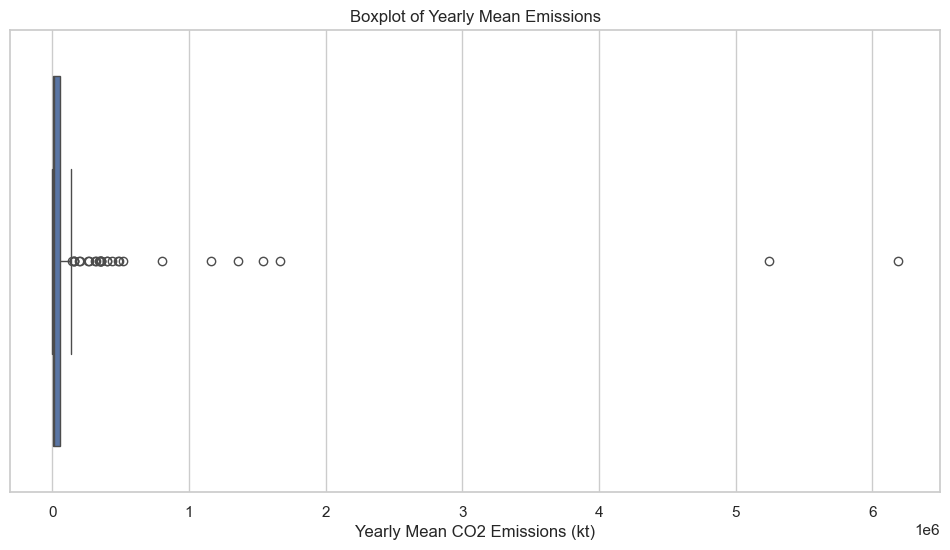

In [72]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=carbon_df_new['Yearly Mean'])
plt.title('Boxplot of Yearly Mean Emissions')
plt.xlabel('Yearly Mean CO2 Emissions (kt)')
plt.show()

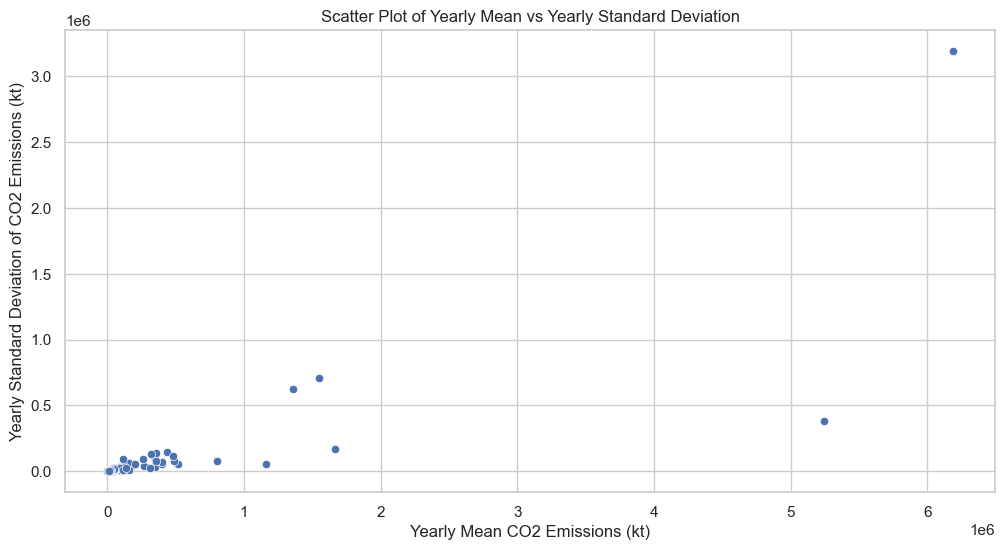

In [73]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Yearly Mean', y='Yearly Standard Deviation', data=carbon_df_new)
plt.title('Scatter Plot of Yearly Mean vs Yearly Standard Deviation')
plt.xlabel('Yearly Mean CO2 Emissions (kt)')
plt.ylabel('Yearly Standard Deviation of CO2 Emissions (kt)')
plt.show()

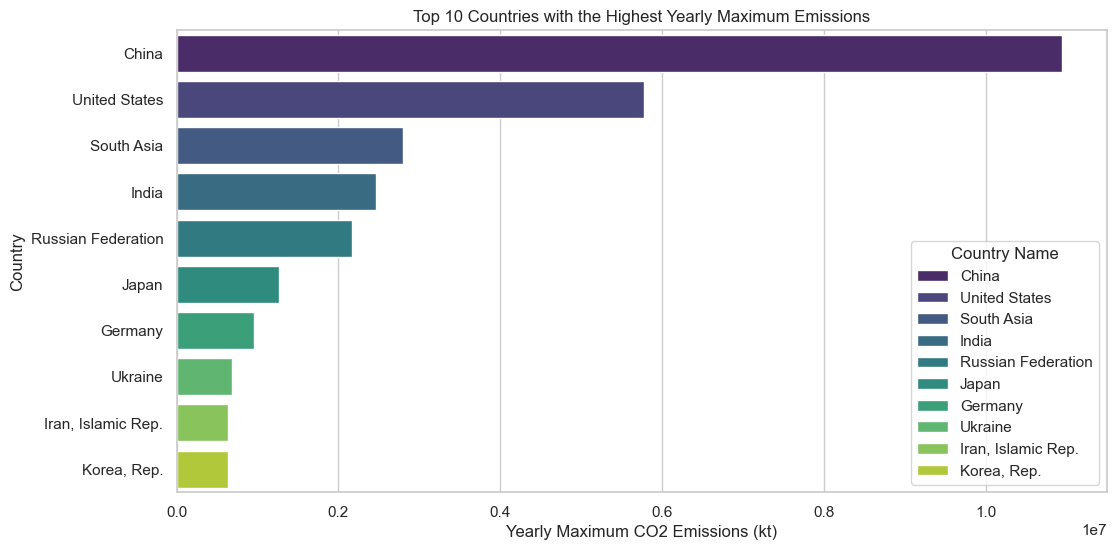

In [81]:
top_emitters = carbon_df_new.nlargest(10, 'Yearly Maximum')
plt.figure(figsize=(12, 6))
sns.barplot(x='Yearly Maximum', y='Country Name', data=top_emitters, hue="Country Name", legend=True, palette='viridis')
plt.title('Top 10 Countries with the Highest Yearly Maximum Emissions')
plt.xlabel('Yearly Maximum CO2 Emissions (kt)')
plt.ylabel('Country')
plt.savefig('../img/top_emitters_bar.png')


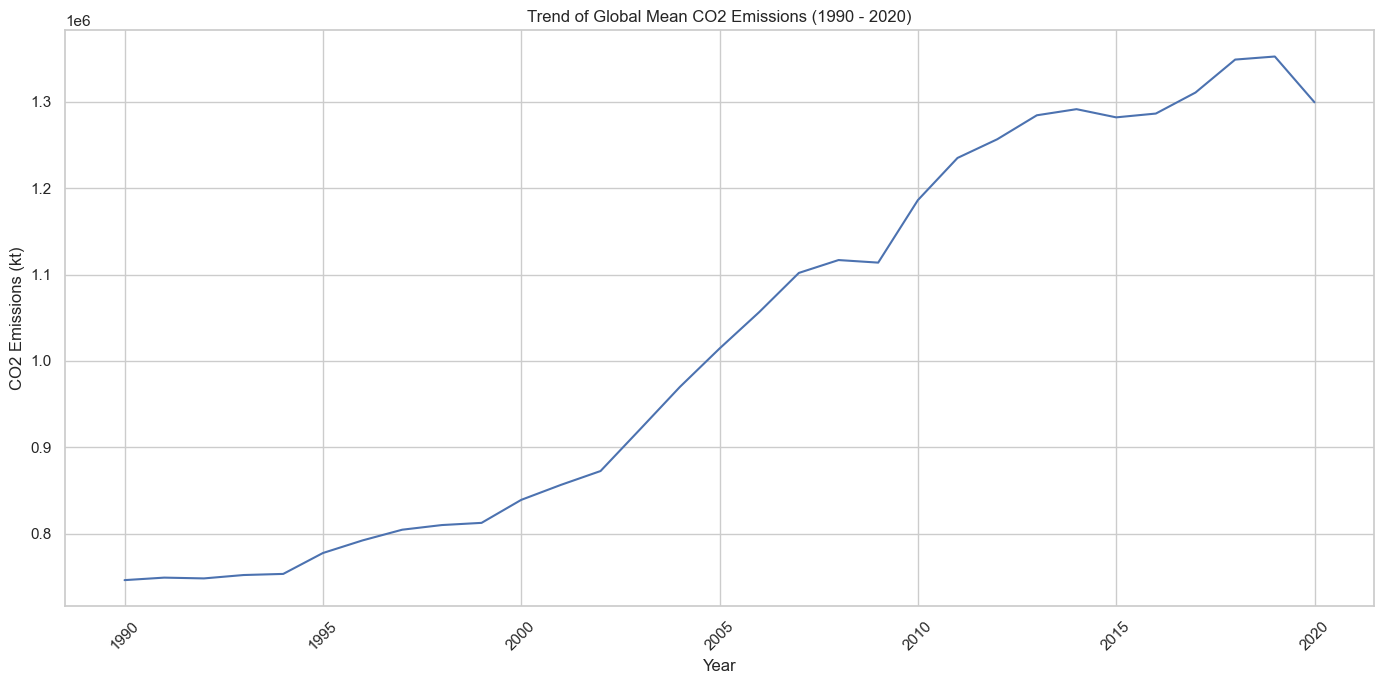

In [82]:
sns.set(style="whitegrid")

global_mean_emissions = carbon_df.drop(['Country Name', 'Country Code'], axis=1).mean()

plt.figure(figsize=(14, 7))
global_mean_emissions.plot()
plt.title('Trend of Global Mean CO2 Emissions (1990 - 2020)')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kt)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../img/global_mean_emissions.png')
